Task 7 was to produce a simulation of the carnot cycle with the assumptions that our gas is monoatomic, gamma =5/3 and n=1.

Hot temperature is 16.000000000000004
Cold temperature is 11.3820585743682
('Work done in Carnot Cycle =', 19.61241683263117, 'this is equal to the heat transferred')


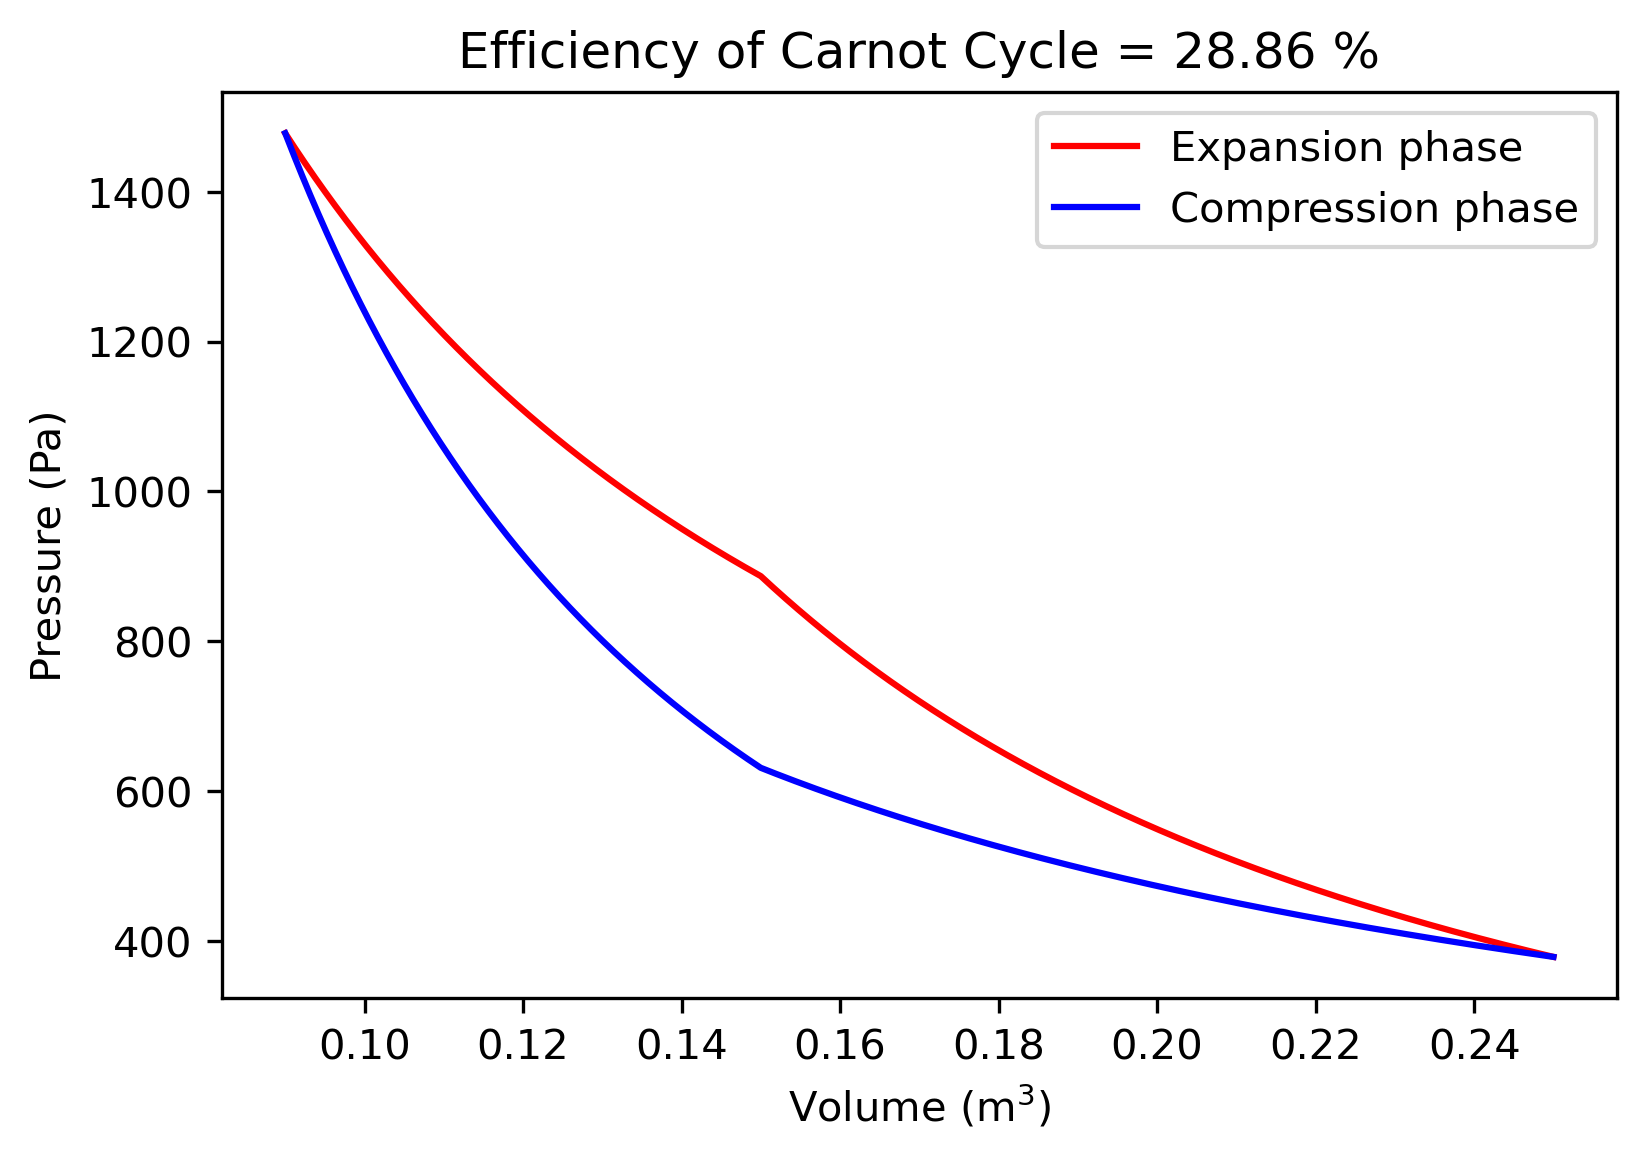

runtime: 0.2375786304473877 seconds


In [15]:
import matplotlib.pyplot as plt
import numpy as np
import time as t

start = t.time()#start time counter

plt.rcParams['figure.dpi'] = 300#increases resolution of matplotlib plots

R = 8.314# Gas constant


def WeightCalc(i, h, nstep):
    if (i==1 or i==nstep):
        weight = h/2
    else:
        weight = h
    return weight


class Isothermal():
    
    def __init__(self, Temp, minV, maxV):
        self.T = Temp
        self.minV = minV*10e-3
        self.maxV = maxV*10e-3

    def f(self, v):
        return (R*self.T)/v
    
    """ 
    Function to be integratedf for isothermal 
    processes. Is also the work done on one mol of gas 
    at temperature self.T and volume v for isothermal
    expansion.
    """
        
    def integ(self, nstep):
        delta = (self.maxV-self.minV)/(nstep-1)
        intsum = 0.0
        x = []
        y = []
        for i in range(0,nstep):
            xc = self.minV + (i*delta)
            w = WeightCalc(i+1,delta, nstep)
            yc = self.f(xc)
            intsum += w*yc
            x.append(xc)
            y.append(yc)  
        return intsum, x, y
    
    """
    Above function uses the trapezium integration method
    covered in the session 5 lecture notes on learn.
    """

    def check(self):
        rform = R*self.T*np.log(self.maxV/self.minV)
        rinteg, x, y = self.integ(5000)
        print("Result using formula =",rform) 
        print("Result using integration =", rinteg)
        
    """
    Above function checks the result of the integration 
    against the result from using the formula.
    """


class Adiabatic:
    
    def __init__(self, Temp, minV, maxV):
        self.T = Temp
        self.minV = minV*10e-3
        self.maxV = maxV*10e-3
        self.gamma = 5/3
    
    def f(self, v):
        return ((R*self.T)/v)*(v**self.gamma)
    
    """
    Function to be integrated for adiabatic processes
    """
            
    def temp_change(self, P1, V1, T1, P2, V2):
        return (P2*V2*T1)/(P1*V1)# returns the change in temperature

    def integ(self, nstep):
        delta = (self.maxV-self.minV)/(nstep-1)
        intsum = 0.0
        x = []
        y = []
        for i in range(0,nstep):
            xc = self.minV + (i*delta)
            w = WeightCalc(i+1,delta, nstep)
            yc = self.f(self.minV)/(xc**self.gamma)
            intsum += w*yc
            x.append(xc)
            y.append(yc)
        return intsum, x, y
    
    """
    Above function uses the trapezium integration method
    covered in the session 5 lecture notes on learn.
    """

    def check(self):
        rform = self.f(self.minV)*(self.maxV**(1-self.gamma)  - self.minV**(1-self.gamma))/(1 - self.gamma)#formula
        rinteg, x, y = self.integ(5000)#integration
        print("Result using formula =",rform) 
        print("Result using integration =", rinteg)
    
    """
    Above function checks the result of the integration 
    against the result from using the formula.
    """

class carnotCycle:
    
    
    def __init__(self, V0, V1, V2, T):
        self.V0 = V0#initial volume
        self.V1 = V1#volume after isothermal 
        self.V2 = V2#volume after adiabatic
        self.T = T

    def stageChange(self, T, V0, V1, V2):
        
        X, Y, W = [], [], 0
        x, y, w = [], [], 0
        cycle =  [Isothermal(T, V0, V1), Adiabatic(T, V1, V2)]#intialises Isothermal and adiabatic objects
  
        for i in cycle:
            w,x,y = i.integ(5000)
            X.extend(x)#adds all elements in x to the end of X
            Y.extend(y)#adds all elements in y to the end of Y
            W+=w#sums the work done in the cycle

        T = cycle[1].temp_change(x[0], y[0], T, x[-1], y[-1])#temperature change
        return X, Y, W, T
    
    """
    Above function is for changing between the
    different phases of the carnot cycle.
    """

    def simulate(self):
        X1, Y1, X2, Y2, W = [], [], [], [], 0
        T_h = 0
        T_c = 0

        X1, Y1, w, T_c = self.stageChange(self.T, self.V0, self.V1, self.V2)#Adiabatic and Isothermal expansion
        W+=w#sums the work done in the cycle
        
        
        X2, Y2, w, T_h = self.stageChange(T_c, self.V2, self.V1, self.V0)#Adiabatic and Isothermal compression
        W+=w#sums the work done in the cycle

        print("Hot temperature is",T_h)
        print("Cold temperature is",T_c)
        print(("Work done in Carnot Cycle =",W,"this is equal to the heat transferred"))


        plt.plot(X1, Y1, color = 'red', label = 'Expansion phase')
        plt.plot(X2, Y2, color = 'blue', label = 'Compression phase')
        plt.title("Efficiency of Carnot Cycle = {:.2f} %".format((100*(T_h - T_c))/T_h))
        plt.xlabel("Volume ($\mathregular{m^{3}}$)")
        plt.ylabel("Pressure (Pa)")
        plt.legend()
        plt.show()
        

def main():
    cc = carnotCycle(9,15,25,16)#carnot cycle initial condtions
    cc.simulate()

main()#executes the program
end = t.time()#end time counter
print("runtime: %s seconds" % (end - start))#program execution time

Equations for carnot cycle obtained from core IV lecture notes. Also the figure matches the expected graph for the carnot cycle.